# Preprocessing

In [17]:
import re
import os
import glob
import html
import shutil

import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm

In [20]:
LACUNA = re.compile(r'\.\.+')

def load_file(path):
    with open(path) as f:
        xml_text = f.read()
    
    xml_text = xml_text.replace('&oudpond;', '')
    xml_text = xml_text.replace('&supm;', 'm')
    xml_text = xml_text.replace('&supM;', 'm')
    xml_text = xml_text.replace('&supc;', 'c')
    xml_text = xml_text.replace('&supt;', 't')
    xml_text = xml_text.replace('&supn;', 'n')
    xml_text = xml_text.replace('&sups;', 's')
    xml_text = xml_text.replace('&supd;', 'd')
    xml_text = xml_text.replace('&supc;', 'c')
    xml_text = xml_text.replace('&uring;', 'u')
    xml_text = xml_text.replace('&lt;', '')
    xml_text = xml_text.replace('&gt;', '')
    xml_text = html.unescape(xml_text)

    soup = BeautifulSoup(xml_text)
    
    data = {}

    # extract metadata:
    data['id'] = os.path.basename(path).replace('.xml', '')
    data['title'] = soup.find('title').text
    data['author'] = soup.find('author').text
    
    postquem = '<UNK>'
    try:
        postquem = soup.find('interpgrp', {'type': 'witnessYear_from'})
        postquem = postquem.find('interp')['value']
    except AttributeError:
        pass
    
    antequem = '<UNK>'
    try:
        antequem = soup.find('interpgrp', {'type': 'witnessYear_to'})
        antequem = antequem.find('interp')['value']
    except AttributeError:
        pass
    
    data['date'] = f'{postquem}-{antequem}'
    
    provenance = '<UNK>'
    try:
        provenance = soup.find('interpgrp', {'type': 'corpusProvenance'})
        provenance = provenance.find('interp')['value']
    except AttributeError:
        pass
    data['provenance'] = provenance
    
    # extract and clean lines:
    lines = []
    for line in soup.find_all('l'):
        text = line.get_text().strip()
        if text and not re.search(LACUNA, text):
            line = ''.join([c for c in text if c.isalpha() or c.isspace()]).strip()
            # catch encoding error specific to Ferguut (<...> for corrector):
            if data['title'] == 'Ferguut':
                if 'lt' in line and 'gt' in line:
                    line = ''.join(line.split('lt', 1))
                    line = ''.join(line.rsplit('gt', 1))
            if line:
                lines.append(line)
        else:
            lines.append('[...]')
    
    data['lines'] = lines
    
    return data

In [21]:
texts = []
for fn in tqdm(glob.glob('../data/cdrom_rhyme/*.xml')):
    texts.append(load_file(fn))

100%|██████████| 262/262 [00:19<00:00, 13.70it/s]


In [22]:
for fn in tqdm(glob.glob('../data/cdrom_CG1/*.xml')):
    with open(fn) as f:
        text = f.read()
    
    # metadata
    data = {}
    data['id'] = os.path.basename(fn).replace('.xml', '')
    data['title'] = re.findall(r'\<bron_oms\>(.*)\<\/bron_oms\>', text)[0]
    postquem = re.findall(r"jaar\_tot\=\'([0-9]+)'", text)[0]
    antequem = re.findall(r"jaar\_van\=\'([0-9]+)'", text)[0]
    data['date'] = f'{postquem}-{antequem}'
    
    data['provenance'] = 'CG1'
    data['author'] = 'Onbekend'
    
    lines = []
    for line in text.split('\n'):
        line = line.strip()
        if not line:
            continue
        line = line.replace('<A >', '').replace('</A>', '')
        if not line or re.search(LACUNA, line):
            lines.append('[...]')
            print('yes')
        else:
            clean = ''
            for word in re.findall(r'<C ([0-9#\*@\+]+)_([^>]+)>\s*([^ \n\t\r<]+)', line):
                word = word[-1]
                word = ''.join([c for c in word if c.isalpha() or c.isspace()]).strip()
                if word:
                    clean += word + ' '
            clean = clean.strip()
            if clean:
                lines.append(clean)
    
    data['lines'] = lines
    
    texts.append(data)

  0%|          | 0/21 [00:00<?, ?it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 43%|████▎     | 9/21 [00:00<00:00, 23.68it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 95%|█████████▌| 20/21 [00:00<00:00, 39.55it/s]


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes

100%|██████████| 21/21 [00:00<00:00, 32.78it/s]


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [23]:
metadata = []
for text in texts:
    d = {d:text[d] for d in text if d != 'lines'}
    metadata.append(d)

In [24]:
mdf = pd.DataFrame(metadata)
mdf = mdf.set_index('id')
mdf

,title,author,date,provenance
id,,,,
ongeidentificeerd_6,Ongeïdentificeerd (6),Onbekend,1375-1400,cdrom-mnl
theophilus,Theophilus,Onbekend,1400-1420,cdrom-mnl
madelgijs_fragm_le2,Madelgijs,Onbekend,1350-1400,cdrom-mnl
roelantslied_fragm_br,Roelantslied,Onbekend,1350-1400,cdrom-mnl
spiegel_der_jongers,Spiegel der jongers,Lambertus Goetman,1510-1520,cdrom-mnl
...,...,...,...,...
"Der naturen bloeme, handschrift M","Der naturen bloeme, handschrift M",Onbekend,1300-1276,CG1
Aiol,Aiol,Onbekend,1240-1220,CG1
Enaamse Codex,Enaamse Codex,Onbekend,1290-1290,CG1


Clean up author labels:

In [25]:
import numpy as np
mdf['author'] = mdf['author'].replace('Niet van toepassing', 'Onbekend')
mdf['author'] = mdf['author'].replace('Onbekend', np.nan)
mdf['author'] = mdf['author'].str.replace(r'Jacob van Maerlant\?', 'Jacob van Maerlant(?)')
mdf['author'].value_counts(dropna=True)

author
Lodewijk van Velthem          16
Jacob van Maerlant            15
Philip Utenbroeke              8
Jan van Boendale               6
Jacob van Maerlant(?)          3
Augustijnken                   3
Jan de Weert                   2
Hadewijch                      2
Hein van Aken                  2
Jacob van Maerlant?            1
Willem van Hildegaersberch     1
Jan Praet                      1
Penninc en Pieter Vostaert     1
Hendrik van Veldeke            1
Jan van Heelu                  1
Dirc Potter                    1
Hein van Aken(?)               1
Lambertus Goetman              1
Melis Stoke                    1
Gielijs van Molhem             1
Diederic van Assenede          1
Clays van Haerlem              1
Heraut Beyeren                 1
Heinriic                       1
Loy Latewaert                  1
Calfstaf en Noydekin(?)        1
Willem                         1
Name: count, dtype: int64

Set some (uninformative) values for missing dates:

In [26]:
mdf.loc['jan_splinters_testament', 'date'] = '1550-1550'
mdf.loc['borchgrave_van_couchi_fragm_dp', 'date'] = '1300-1325'
mdf.loc['grimbergse_oorlog', 'date'] = '1300-1350'

In [27]:
mdf['date_range'] = mdf['date']
dates = []
for d in mdf['date_range']:
    d1, d2 = [int(date_str) for date_str in d.split('-')]
    d = d1 + ((d2 - d1) / 2)
    dates.append(d)
mdf['date'] = dates

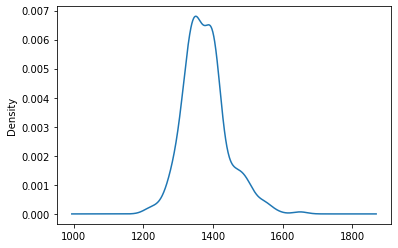

In [28]:
mdf['date'].plot.kde();

In [29]:
mdf['genre'] = None
mdf['subgenre'] = None
mdf.to_excel('../data/metadata_extract.xlsx', header=True, index=True)

## Enrich using PIE

Taken from the [PIE NLP Taggers documentation](https://github.com/hipster-philology/nlp-pie-taggers):

In [30]:
from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download
import lxml.etree

In [31]:
do_download = False # set to True if necessary
if do_download:
    for dl in download("dum"):
        x = 1

In [32]:
xml_path = '../data/xml'
try:
    shutil.rmtree(xml_path)
except FileNotFoundError:
    pass
os.mkdir(xml_path)

In [33]:
from pie_extended.models.dum.imports import get_iterator_and_processor
from collections import defaultdict

iterator, processor = get_iterator_and_processor()
tagger = get_tagger('dum', batch_size=2048, device="cpu", model_path=None)    

In [34]:
for text in tqdm(texts):
    title = text['id']
    root = lxml.etree.Element('text')
    root.attrib['id'] = title
    
    lines: List[str] = [l for l in text['lines']]
    for nb, line in enumerate(lines):
        
        l_node = lxml.etree.Element('l')
        l_node.attrib['n'] = str(nb + 1)
        if line == '[...]':
            l_node.attrib['status'] = 'lacuna'
        else:        
            for w in tagger.tag_str(line.lower(), iterator=iterator, processor=processor):
                w_node = lxml.etree.Element('w')
                for tag in ('form', 'lemma', 'pos'):
                    subnode = lxml.etree.Element(tag)
                    subnode.text = w[tag]
                    w_node.append(subnode)

                l_node.append(w_node)
                
            l_node.attrib['tokens'] = text['lines'][nb]
        
        root.append(l_node)
    
    with open(f'{xml_path}/{title}.xml', 'w') as f:
        f.write(lxml.etree.tostring(root, xml_declaration=True,
                                pretty_print=True, encoding='utf-8').decode())


  0%|          | 0/283 [00:00<?, ?it/s]

yes
yes
yes
yes
yes
yes
yes


  1%|          | 2/283 [00:13<33:52,  7.23s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


  1%|          | 3/283 [00:19<30:37,  6.56s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


  2%|▏         | 5/283 [00:31<30:00,  6.48s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


  2%|▏         | 6/283 [00:39<32:33,  7.05s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


  2%|▏         | 7/283 [00:41<25:09,  5.47s/it]

yes


  3%|▎         | 8/283 [00:51<31:09,  6.80s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


  4%|▎         | 10/283 [01:08<35:40,  7.84s/it]

yes
yes
yes
yes


  4%|▍         | 11/283 [01:17<36:31,  8.06s/it]

yes
yes
yes
yes
yes
yes
yes


  6%|▌         | 16/283 [01:55<35:36,  8.00s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


  6%|▌         | 17/283 [01:58<28:24,  6.41s/it]

yes


  6%|▋         | 18/283 [02:01<24:18,  5.50s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


  7%|▋         | 19/283 [02:04<20:15,  4.61s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


  8%|▊         | 23/283 [02:36<31:42,  7.32s/it]

yes
yes


  8%|▊         | 24/283 [02:46<34:22,  7.96s/it]

yes


  9%|▉         | 26/283 [02:52<22:38,  5.29s/it]

yes


 10%|▉         | 28/283 [03:09<29:31,  6.95s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 10%|█         | 29/283 [03:13<25:33,  6.04s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 11%|█         | 30/283 [03:16<21:15,  5.04s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 11%|█         | 31/283 [03:20<19:56,  4.75s/it]

yes
yes
yes
yes
yes
yes
yes


 11%|█▏        | 32/283 [03:29<25:09,  6.01s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 12%|█▏        | 33/283 [03:35<25:36,  6.14s/it]

yes
yes
yes
yes
yes
yes
yes


 12%|█▏        | 33/283 [03:36<27:22,  6.57s/it]


KeyboardInterrupt: 